In [78]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/naver-movie-review-dataset/ratings_train.txt
/kaggle/input/naver-movie-review-dataset/ratings_test.txt


# Sentimental Analysis (Labeled Training Data)

## Load Data

In [79]:
import numpy as np
import pandas as pd

train_df = pd.read_csv('/kaggle/input/naver-movie-review-dataset/ratings_train.txt',sep='\t')
test_df = pd.read_csv('/kaggle/input/naver-movie-review-dataset/ratings_test.txt',sep='\t')

# Check Data & Imputing

In [80]:
train_df.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [81]:
train_df.label.value_counts()

0    75173
1    74827
Name: label, dtype: int64

In [82]:
train_df.shape

(150000, 3)

In [83]:
train_df.isna().sum()

id          0
document    5
label       0
dtype: int64

In [84]:
train_df.dropna(inplace=True)

In [85]:
train_df.shape

(149995, 3)

In [86]:
test_df.dropna(inplace=True)

In [87]:
import re
for df in [train_df,test_df]:
    df.document = df.document.apply(lambda x : re.sub(r"\d+"," ",x))

# Konlpy

In [88]:
!pip3 install konlpy

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [89]:
from konlpy.tag import Okt
okt = Okt()

def tokenizer(text):
    tokens = okt.morphs(text)
    return tokens
    

In [91]:
print(train_df.loc[4,'document'])
print(tokenizer(train_df.loc[4,'document']))

사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다
['사이', '몬페', '그', '의', '익살스런', '연기', '가', '돋보였던', '영화', '!', '스파이더맨', '에서', '늙어', '보이기만', '했던', '커스틴', '던스트', '가', '너무나도', '이뻐', '보였다']


# WORDCLOUD

In [90]:
from tqdm.notebook import tqdm
sampled_train_df = train_df.sample(3000)
morphs = [] 
for sentence in tqdm(sampled_train_df.document.values): 
    morphs.append(okt.pos(sentence)) 
print(morphs[:10])




[[('더락', 'Noun'), ('이', 'Josa'), ('출연', 'Noun'), ('해서', 'Verb'), ('점', 'Noun'), ('더', 'Noun'), ('준다', 'Verb')], [('처음', 'Noun'), ('에', 'Josa'), ('사사사사', 'Noun'), ('소리내면서', 'Verb'), ('움직일', 'Verb'), ('때', 'Noun'), ('전체', 'Noun'), ('화면', 'Noun'), ('에서', 'Josa'), ('작은', 'Adjective'), ('화면', 'Noun'), ('으로', 'Josa'), ('전환', 'Noun'), ('하고', 'Josa'), ('부스럭', 'Noun'), ('소리내면서', 'Verb'), ('가방', 'Noun'), ('뒤', 'Noun'), ('적', 'Suffix'), ('일', 'Modifier'), ('때', 'Noun'), ('끔', 'Verb'), ('ㅡㅡ', 'KoreanParticle')], [('독일', 'Noun'), ('의', 'Josa'), ('총알', 'Noun'), ('은', 'Josa'), ('우리', 'Noun'), ('를', 'Josa'), ('구별', 'Noun'), ('하지', 'Verb'), ('않는다', 'Verb'), ('.', 'Punctuation')], [('탄탄한', 'Adjective'), ('스토리', 'Noun'), ('와', 'Josa'), ('그래픽', 'Noun'), ('수준', 'Noun'), ('은', 'Josa'), ('최고다', 'Noun')], [('쓰레기', 'Noun')], [('리뷰', 'Noun'), ('만', 'Josa'), ('보고', 'Noun'), ('재밌을줄', 'Adjective'), ('알아서', 'Verb'), ('봤는데', 'Verb'), ('개시시', 'Adverb'), ('ㅋ', 'KoreanParticle'), ('중국영화', 'Noun'), ('는', 'Josa'), ('볼',

In [92]:
noun_adj_adv_list=[] 
for sentence in morphs : 
    for word, tag in sentence : 
        if tag in ['Noun'] and ("것" not in word) and ("내" not in word)and ("나" not in word)and ("수"not in word) and("게"not in word)and("말"not in word):
            noun_adj_adv_list.append(word) 
print(noun_adj_adv_list)



['더락', '출연', '점', '더', '처음', '사사사사', '때', '전체', '화면', '화면', '전환', '부스럭', '가방', '뒤', '때', '독일', '총알', '우리', '구별', '스토리', '그래픽', '최고다', '쓰레기', '리뷰', '보고', '중국영화', '볼', '진짜', '명작', '중', '명작', '임', '독일', '소령', '바', '실리', '때', '긴장감', '느낌', '역시', '이건', '시간', '명작', '거', '영화', '평점', '점', '간만', '잼', '한장', '면도', '영화', '샘', '라일', '리', '이안', '티스', '빙의', '소름', '정도', '안톤', '코르', '빈', '감독', '최근', '데인드', '주연', '제임스', '딘', '전기영', '기대', '고딩', '알바', '좀', '영화', '멜로디', '사랑', '한집안', '여자', '송경령', '강인', '룸싸롱', '폭행', '음주운전', '뺑소니', '관왕', '그', '강인', '알바', '속지', '점주', '낯', '알바', '린다', '영화', '케빈', '코스트', '너', '연기', '별로', '돈', '영화', '볼라', '황금', '금요일', '밤', '시간', '생각', '진짜', '시간', '영화인', '줄', '시간', '영화', '끝', '극장', '개봉', '하자', '마자', '바로', '쫄딱', '영화', '당시', '이영화', '보고', '사람', '욕', '잼', '헐리웃', '액션', '스토리', '러브', '라인', '박자', '얘', '연기', '뭐', '거', '왜', '시체', '유기', '난리', '전혀', '연관', '뭔가', '도안', '그냥', '정체', '여자', '신의', '깜짝등장', '환영', '등', '전개', '몇번', '킬', '의문', '죽음', '이유', '채', '영화', '거기', '마지막', '뭥미', '뭐', '영화', '짜증', '쓰레

In [96]:
from wordcloud import WordCloud 

import matplotlib.pyplot as plt

import nltk
%matplotlib inline

import matplotlib
matplotlib.rc('font',family = 'Malgun Gothic')

In [98]:
freq_dict = {}
for noun in noun_adj_adv_list:
    if noun not in freq_dict:
        freq_dict[noun] = 1
    else:
        freq_dict[noun] += 1
print(freq_dict)

{'더락': 1, '출연': 15, '점': 174, '더': 97, '처음': 59, '사사사사': 1, '때': 79, '전체': 7, '화면': 6, '전환': 2, '부스럭': 1, '가방': 1, '뒤': 13, '독일': 4, '총알': 2, '우리': 29, '구별': 1, '스토리': 100, '그래픽': 4, '최고다': 13, '쓰레기': 83, '리뷰': 7, '보고': 89, '중국영화': 2, '볼': 61, '진짜': 186, '명작': 52, '중': 28, '임': 44, '소령': 1, '바': 7, '실리': 1, '긴장감': 11, '느낌': 40, '역시': 44, '이건': 52, '시간': 78, '거': 73, '영화': 1002, '평점': 119, '간만': 11, '잼': 22, '한장': 2, '면도': 2, '샘': 2, '라일': 1, '리': 10, '이안': 1, '티스': 1, '빙의': 1, '소름': 6, '정도': 52, '안톤': 1, '코르': 1, '빈': 2, '감독': 78, '최근': 5, '데인드': 1, '주연': 9, '제임스': 2, '딘': 1, '전기영': 1, '기대': 23, '고딩': 3, '알바': 22, '좀': 74, '멜로디': 2, '사랑': 56, '한집안': 1, '여자': 42, '송경령': 1, '강인': 3, '룸싸롱': 1, '폭행': 1, '음주운전': 2, '뺑소니': 1, '관왕': 1, '그': 75, '속지': 5, '점주': 5, '낯': 1, '린다': 4, '케빈': 4, '코스트': 1, '너': 9, '연기': 121, '별로': 38, '돈': 35, '볼라': 2, '황금': 2, '금요일': 2, '밤': 5, '생각': 95, '영화인': 13, '줄': 18, '끝': 54, '극장': 16, '개봉': 13, '하자': 2, '마자': 1, '바로': 11, '쫄딱': 1, '당시': 15, '이영화': 31, '사람': 1

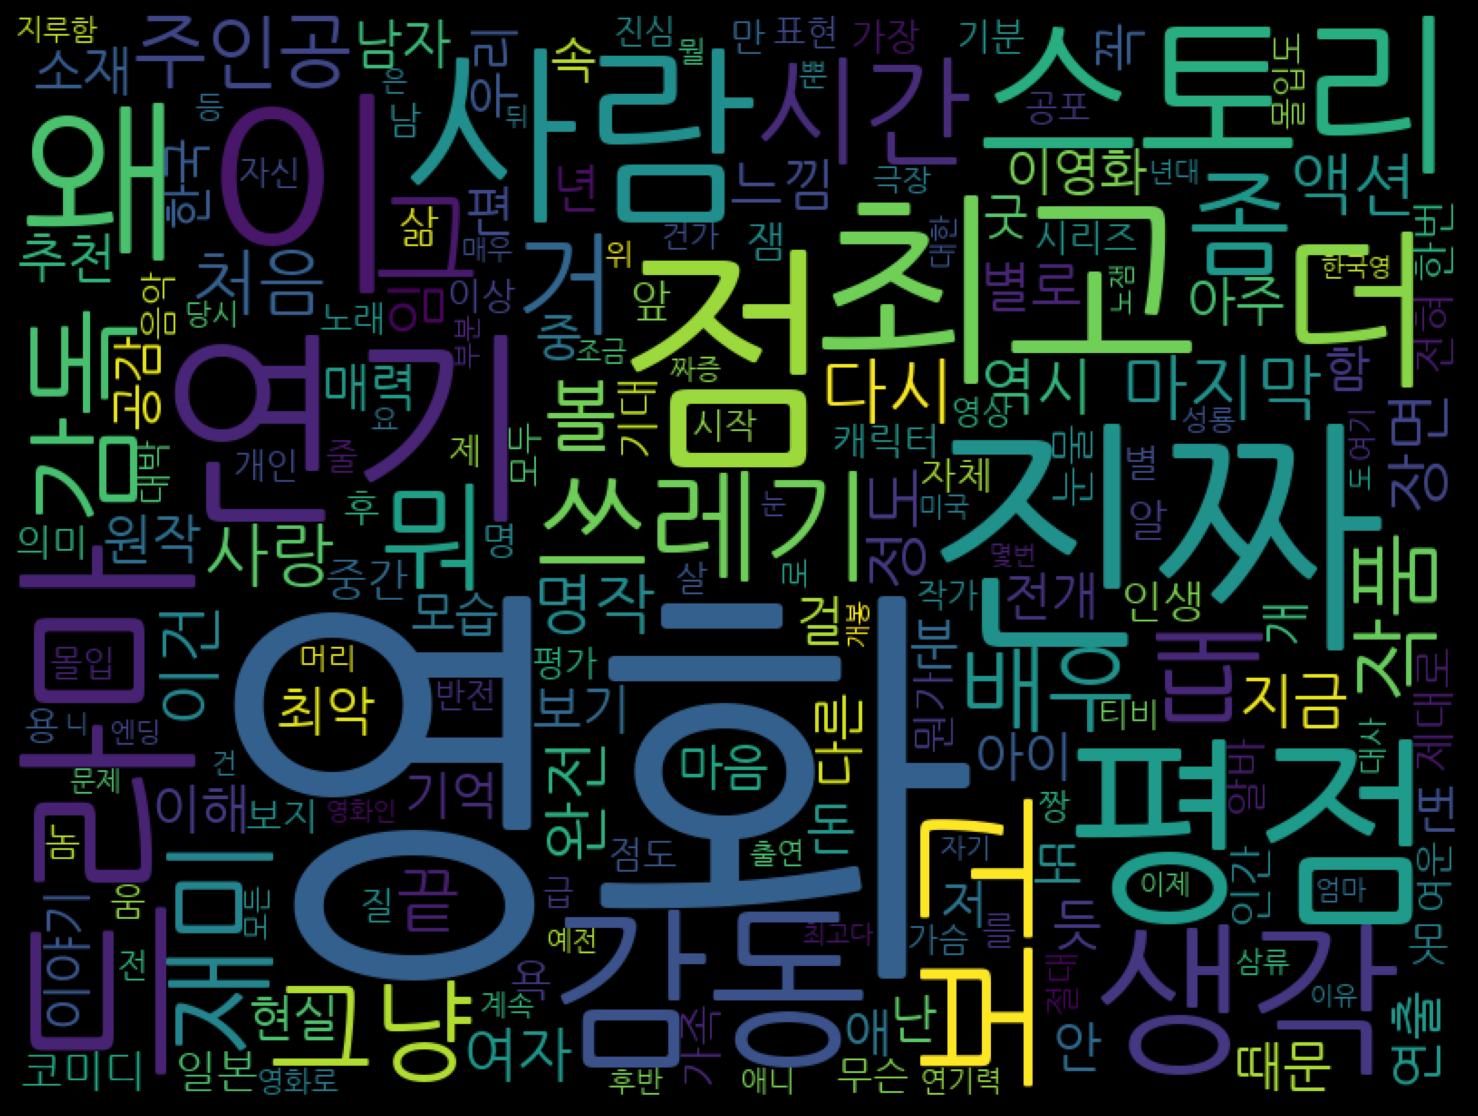

In [122]:
wordcloud = WordCloud(font_path= '../input/kor-fonts/NANUMGOTHIC.TTF',width=800,height=600).generate_from_frequencies(freq_dict)
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis('off')
plt.show()



# Sentimental Analysis (Naver Movie Review Dataset)

In [124]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

tfidf_vect = TfidfVectorizer(tokenizer=tokenizer,ngram_range=(1,3),min_df=3,max_df=.9)
tfidf_vect.fit(sampled_train_df.document)
tfidf_matrix_tr = tfidf_vect.transform(sampled_train_df.document)

In [125]:
lg = LogisticRegression(C=3.5,max_iter=1000)

In [126]:
lg.fit(tfidf_matrix_tr,sampled_train_df.label)

LogisticRegression(C=3.5, max_iter=1000)

In [127]:
from sklearn.metrics import accuracy_score
sampled_test_df=test_df.sample(5000)
pred=lg.predict(tfidf_vect.transform(sampled_test_df.document))
print('Accracy: {:.2f}'.format(accuracy_score(sampled_test_df.label,pred)))

Accracy: 0.76


In [130]:
while True:
    text=[input()]
    if text[0] == 'exit':
        break
    print('==> Label:'+('긍정적인 리뷰' if lg.predict(tfidf_vect.transform(text))[0] else '부정적인 리뷰'))



안녕 재미없어
==> Label:부정적인 리뷰
재미있네요
==> Label:부정적인 리뷰
영화 재미있어요
==> Label:긍정적인 리뷰
영화진짜 재미없네요
==> Label:부정적인 리뷰
영화 볼만해요
==> Label:긍정적인 리뷰
그럭저럭 다신 안볼듯
==> Label:부정적인 리뷰
exit


In [145]:
for x in lexicon_example:
    print(x)

우울
자살
행복
기쁨
눈물
슬프다
기쁘
슬프
무력


In [161]:
lexicon_example= {'우울':'우울','자살':'우울','행복':'행복','기쁨':'행복','눈물':'슬픔','슬프다':'슬픔','기쁘':'기쁨','슬프':'슬픔',
                 '무력':'우울'}
text = input().split()
sentimental_dict= {}
for word in text:
    for sentiment_word in lexicon_example:
        if sentiment_word in word:
                if lexicon_example[sentiment_word] not in sentimental_dict:
                    sentimental_dict[lexicon_example[sentiment_word]] = 1
                else:
                    sentimental_dict[lexicon_example[sentiment_word]] += 1
print(sentimental_dict)

sentiment_report = []
all_sent_num = sum(sentimental_dict.values())
for key,val in sorted(sentimental_dict.items(),key=(lambda x:x[1]),reverse=True):
    print('{}: {:.2f}%'.format(key,val/all_sent_num*100))

우울하고 자살하고싶다 코로나가 싫다
['우울하고', '자살하고싶다', '코로나가', '싫다']
{'우울': 2}
우울: 100.00%
